Le but de ce TP est de se familiariser avec la notion de sur-apprentissage et de voir deux façon de luter contre cela: la procédure de test et les méthodes de régularisation. 

On commence par charger les bibliothèques nécessaires:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1: régression polynomiale

On se donne deux fichiers de données $x$ et $y$. On veut trouver un modèle polynomial qui explique ces données, c'est à dire de trouver des coefficients $w_0,w_1\dots$ tels que:  
$$ y_i = \sum_k w_k x^k_i + \epsilon_i,$$ 
où $\epsilon$ est un bruit. 

On commence par récupérer les données: 

In [2]:
x = np.loadtxt("exercice1_x.csv", delimiter=",")
y = np.loadtxt("exercice1_y.csv", delimiter=",")
n = len(x)

### Visualiser les données
Tracer $y$ en fonction de $x$ (indication: utiliser `plt.plot()`)

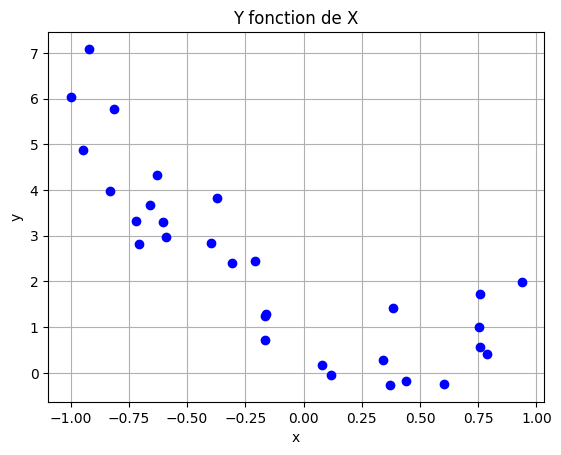

In [3]:
plt.plot(x, y, 'bo')
plt.title('Y fonction de X')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


Écrire une fonction `plot_coefs(w)` qui trace le polynome $\sum_k w_k x^k$ en fonction de $x\in[-1,1]$. 

(indication: utiliser `np.linspace(-1,1,1000)`)

Tracer vos données ainsi qu'un polynome quelconque sur le même graphe.


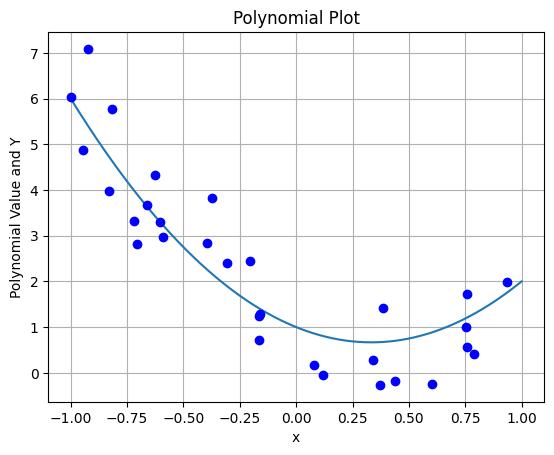

In [4]:
linspace = np.linspace(-1, 1, 1000)

def result_polynome(x, w):
    result = 0
    for i in range(len(w)):
        result += w[i] * (x ** i)
    return result

def plot_coefs(w):
    p_en_fonction_x = []
    for xi in linspace:
        p_en_fonction_x.append(result_polynome(xi, w))
        
    plt.plot(linspace, p_en_fonction_x)
    plt.plot(x, y, 'bo')
    plt.xlabel('x')
    plt.ylabel('Polynomial Value and Y')
    plt.title('Polynomial Plot')
    plt.grid()
    plt.show()


plot_coefs([1, -2, 3])  # Example coefficients [1, -2, 3]

        

### Régression polynomiale

Écrire une fonction `MSE_polynome(x, y, w)` qui rend prend en entrée $x$, $y$, et les coefficients $w$ du polynome et qui rend l'erreur quadratique moyenne: 
$$L(w) = (1/n)\sum_{i=1}^n (y_i - \sum_k w_k x_i^k)^2. $$


In [5]:
def MSE_polynome(x_v, y_v, w):
    mse_value = 0
    for i in range(len(x_v)):
        mse_value += ((y_v[i] - result_polynome(x_v[i], w))**2)
    
    return (mse_value / len(x_v))

Écrire une fonction `meilleur_polynome(x,y,degree)` qui rend un vecteur $a$ qui minimise l'erreur quadratique moyenne. 

Indications: trois possibilités:
- le plus simple: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
- pour se ramener à un problème linéaire: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html
- Utiliser qu'un minimiseur de l'erreur doit satisfaire $\partial L(w) / \partial w_j = (1/n) \sum_{i=1}^n 2 x_i^j(\sum_k w_k x_i^k - y_i)$ qui est un système linéaire du type $Ax=b$ et qui a donc une solution $x=(A)^{-1}b$. 

In [6]:
def meilleur_polynome(x, y, degree):
    return np.polyfit(x, y, degree)[::-1]


Calculer les meilleus polynomes pour $\mathrm{degree}\in[0,1,2,3,5,10,20,30]$ et tracer l'erreur moyenne en fonction du degré. Que remarquez vous? 

Superposez les polynomes obtennus sur les données. 

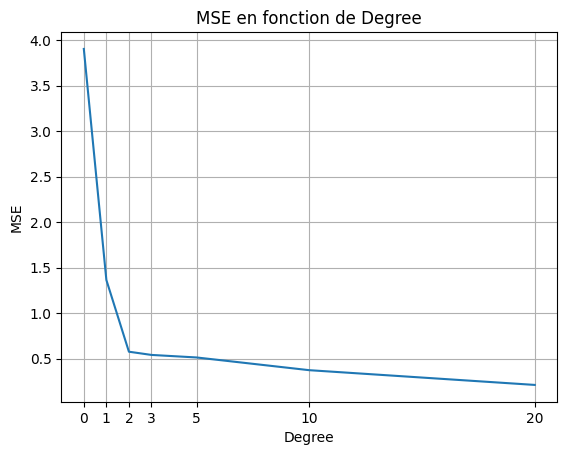

Le plus grand degree donne la plus petite erreur moyenne, donc le meilleur polynome est celui de degree 20
Pourtant, il est possible que le polynome de degree 20 soit overfitting


In [7]:

degree_list = [0,1,2,3,5,10,20]

erreur_moyenne = []

for i in range(len(degree_list)):
    w = meilleur_polynome(x, y, degree_list[i])
    
    erreur_moyenne.append(MSE_polynome(x, y, w))
    
plt.plot(degree_list, erreur_moyenne)
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('MSE en fonction de Degree')
plt.grid()
plt.xticks(degree_list)
plt.show()

print("Le plus grand degree donne la plus petite erreur moyenne, donc le meilleur polynome est celui de degree 20")
print("Pourtant, il est possible que le polynome de degree 20 soit overfitting")

### Séparation en un jeu d'entrainement et de test. 

On sépare maintenant en deux nos jeux de données: un jeu d'entrainement (`x_train` et `y_train`) et un jeu de test (`x_test` et `y_test`). On se servira du jeu d'entrainement pour apprendre les paramètres du modèle (ici les coefficients du polynome) et du jeu de test pour tester sa performance. 

In [8]:
n_train = int(2*n/3)
n_test = n - n_train
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

Tracer en fonction du degré: 
- l'erreur quadratique moyenne sur le jeu d'entrainement
- l'erreur quadratique moyene sur le jeu de test

Conclure sur le meilleur polynome à utiliser. 


/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


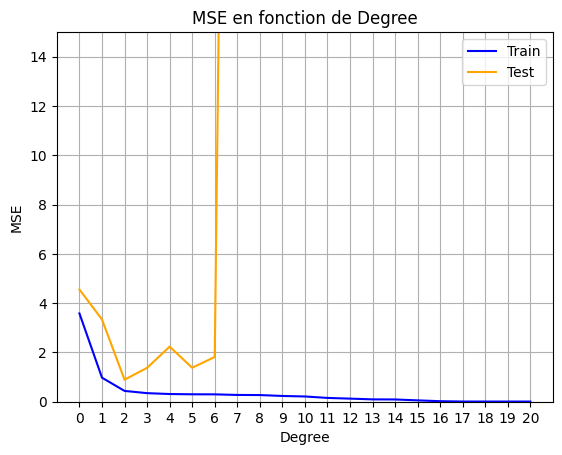

La courbe bleue diminue fortement au début avec l'augmentation du degré, puis se stabilise autour de zéro.
 => Les polynômes de degré plus élevé s'ajustent bien aux données d'entraînement.
La courbe orange diminue au début, mais oscille fortement pour les degrés intermédiaires avant de s'ajuster.
 => Cela montre une tendance au sur-apprentissage (overfitting) pour les degrés plus élevés.

Le meilleur choix de polynôme ici serait un polynôme de degré 2, car il minimise l'erreur de test tout en évitant l'overfitting.


In [9]:
degree_list = [a for a in range(21)]
erreur_moyenne_train = []
erreur_moyenne_test = []

for i in range(len(degree_list)):
    w_train = meilleur_polynome(x_train, y_train, degree_list[i])
    
    erreur_moyenne_train.append(MSE_polynome(x_train, y_train, w_train))
    erreur_moyenne_test.append(MSE_polynome(x_test, y_test, w_train))
 
plt.plot(degree_list, erreur_moyenne_train, label='Train MSE', color='blue')
plt.plot(degree_list, erreur_moyenne_test, label='Test MSE', color='orange')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.grid()
plt.title('MSE en fonction de Degree')
plt.legend(['Train', 'Test'])
plt.ylim(0, 15)
plt.xticks(degree_list)
plt.show()

print("La courbe bleue diminue fortement au début avec l'augmentation du degré, puis se stabilise autour de zéro.")
print(" => Les polynômes de degré plus élevé s'ajustent bien aux données d'entraînement.")
print("La courbe orange diminue au début, mais oscille fortement pour les degrés intermédiaires avant de s'ajuster.")
print(" => Cela montre une tendance au sur-apprentissage (overfitting) pour les degrés plus élevés.\n")
print("Le meilleur choix de polynôme ici serait un polynôme de degré 2, car il minimise l'erreur de test tout en évitant l'overfitting.")


## Exercice 2: Régularisation 

Afin d'éviter de sur-apprendre, on peut ajouter un terme de régularisation. En prenant une régularisation $L_2$, la fonction à minimiser devient ainsi: 
$$L(w, \lambda) = (1/n)\sum_{i=1}^n (y_i - \sum_k w_k x_i^k)^2 + \lambda \sum_{k\ge1} (w_k)^2,$$
où $\lambda>0$ est un paramètre à déterminer. C'est ce qu'on appelle une pénalisation "ridge" (en remplaçant $(w_k)^2$ par $|w_k$, on obtient une regression "lasso")


On prendra un polynome de degré assez élevé (typiquement $10$).  Tracer en fonction de $\lambda$ l'erreur sur le jeu de test et le jeu d'apprentissage. Comme avant, on apprendra les paramètres de test sur le jeu d'apprentisagge et on calculera l'erreur à la fois sur le jeu d'apprentissage et le jeu de test. 
- quel est le $\lambda$ qui donne la meilleure performance? 
- à quoi ressemble le polynôme obtenu ? 

(Indication: en dérivant L par rapport à w_j cela nous donne un système linéaire que l'on peut demander à numpy de résoudre).

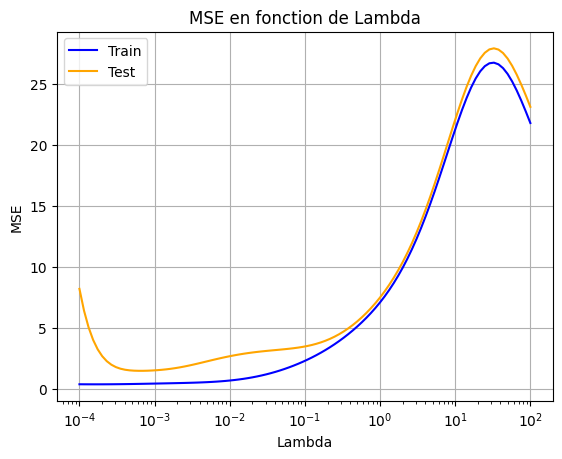

Lorsque lambda est très petit, l'erreur de test est plus grande que l'erreur d'entraînement.
=> Cela montre un sur-apprentissage (overfitting) pour les valeurs de lambda très petites
Lorsque lambda est très grand, l'erreur de test est plus grande que l'erreur d'entraînement.
=> Cela montre un sous-apprentissage (underfitting) pour les valeurs de lambda très grandes
Le lambda optimal est celui qui minimise l'erreur de test (ou avant l'augmentation de l'erreur de test apres sa diminution initiale)
=> Ici, le lambda optimal est autour de 10^-4 à 10^-3
En utilisant la fonction np.argmin(), le lambda optimal est 0.000614


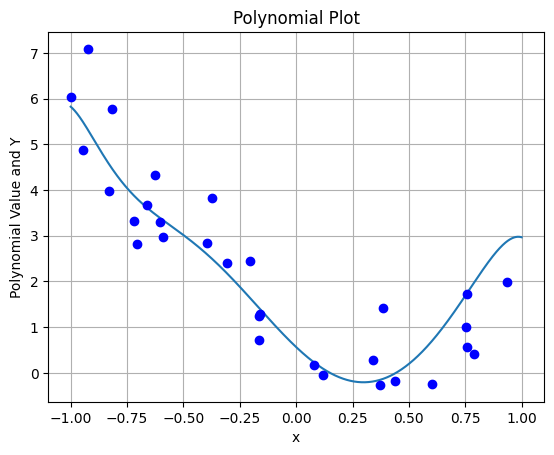

In [10]:
def vandermonde_matrix(x, degree):
    V = np.ones((len(x), degree + 1))
    
    for i in range(1, degree + 1):
        V[:, i] = x**i
    
    return V

def ridge_regression(x, y, degree, lambda_):
    X = vandermonde_matrix(x, degree)   
    I = np.eye(X.shape[1])  # unit matrix
    w = np.linalg.solve(np.dot(X.T, X) + lambda_ * I, np.dot(X.T, y)) # @ is matrix multiplication but 2.7.16 does not support
    return w
    
def penalty_term_regulatization(w, lambda_):
    res = 0
    for i in range(1, len(w)):
        res += lambda_ * w[i]**2
    return res

def loss_rigde(x, y, w, lambda_):
    return MSE_polynome(x, y, w)  + penalty_term_regulatization(w, lambda_)

lambda_list = np.logspace(-4, 2, 100)
degree = 10
erreur_moyenne_train = []
erreur_moyenne_test = []

for lambda_ in lambda_list:
    w_train = ridge_regression(x_train, y_train, degree, lambda_)
    erreur_moyenne_train.append(loss_rigde(x_train, y_train, w_train, lambda_))
    erreur_moyenne_test.append(loss_rigde(x_test, y_test, w_train, lambda_))

plt.plot(lambda_list, erreur_moyenne_train, label='Train MSE', color='blue')
plt.plot(lambda_list, erreur_moyenne_test, label='Test MSE', color='orange')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.grid()
plt.title('MSE en fonction de Lambda')
plt.legend(['Train', 'Test'])
plt.xscale('log')
plt.show()

print("Lorsque lambda est très petit, l'erreur de test est plus grande que l'erreur d'entraînement.")
print("=> Cela montre un sur-apprentissage (overfitting) pour les valeurs de lambda très petites")
print("Lorsque lambda est très grand, l'erreur de test est plus grande que l'erreur d'entraînement.")
print("=> Cela montre un sous-apprentissage (underfitting) pour les valeurs de lambda très grandes")
print("Le lambda optimal est celui qui minimise l'erreur de test (ou avant l'augmentation de l'erreur de test apres sa diminution initiale)")
print("=> Ici, le lambda optimal est autour de 10^-4 à 10^-3")

optimal_lambda = lambda_list[np.argmin(erreur_moyenne_test)]
print("En utilisant la fonction np.argmin(), le lambda optimal est %f" % optimal_lambda)


w_optimal = ridge_regression(x_train, y_train, degree, optimal_lambda)
plot_coefs(w_optimal)
